In [14]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import clear_output

In [ ]:
class animated_gaussian():
    def __init__(self, figure, total_steps, x_limits=[-1,1], rng):
        self.total_steps = total_steps
        self.rng = rng
        self.current_step = 0
        self.figure = figure

    def draw(self, number, mean=0.5, std=1, n_stds=1):
        ax = self.figure.gca()

        # Draw the horizontal line
        ax.axhline(y=0, color='black', linewidth=2)

        # Draw the green transparent rectangle for correct limits
        correct_limits = [mean - n_stds*std, mean + n_stds*std]
        ax.add_patch(
            plt.Rectangle(
                (correct_limits[0], -0.05),  # (x, y)
                correct_limits[1] - correct_limits[0],  # width
                0.1,  # height
                color='green',
                alpha=0.3,
                zorder=0
            )
        )
        # Draw the red cross at the specified number
        ax.plot(number, 0, marker='x', color='red', markersize=12, markeredgewidth=3, label='Your guess')

        # Draw the Gaussian above the line
        x = np.linspace(mean - 4*std, mean + 4*std, 400)
        y = norm.pdf(x, mean, std)
        y = y / y.max() * 0.5 + 0.2  # Scale and shift up for visibility above the line
        ax.plot(x, y, color='blue', label='Gaussian')

        # Optionally, mark the mean of the Gaussian
        ax.plot(mean, 0.2 + 0.5, marker='o', color='blue', markersize=8, label='Mean')

        # Formatting
        ax.set_ylim(-0.2, 1)
        # ax.set_xlim(mean - x_std_limits,mean+ x_std_limits)
        ax.set_xlim(self.x_limits)
        ax.set_yticks([])
        ax.legend()
        self.figure.show()

In [38]:
anim = animated_gaussian(figure=plt.figure(figsize=(6, 4)), total_steps=300, rng=np.random.default_rng(42))
anim.draw(0.7, mean=0.5, std=0.5)

In [6]:
class NonStationaryGaussian:
    def __init__(self, mean=0.0, std=1.0, mean_drift_std=0.1, rng=None):
        self.mean = mean
        self.std = std
        self.mean_drift_std = mean_drift_std
        self.rng = rng if rng is not None else np.random.default_rng()

    def sample(self):
        return self.rng.normal(self.mean, self.std)

    def step(self):
        # Slightly change the mean to simulate non-stationarity
        # self.mean += self.rng.normal(0, self.mean_drift_std)
        self.mean += self.rng.choice([-self.mean_drift_std, self.mean_drift_std])
        
    def is_within_stds(self, value, n_stds=1):
        """
        Check if a value is within n standard deviations from the mean.
        """
        return abs(value - self.mean) <= n_stds * self.std

In [5]:
#parameters
total_steps = 300
rng = np.random.default_rng(42)
q_value = np.empty((total_steps))
alpha = 0.1

In [ ]:

gaussian = NonStationaryGaussian(mean=0.0, std=1.0, mean_drift_std=0.5, rng=rng)
guess = 0.5
q_value[0] = guess  # Initialize the first guess
for step in range(total_steps):
    # Sample from the non-stationary Gaussian
    # sample = gaussian.sample()
    # Check if the sample is within 1 standard deviation of the mean
    n_stds = 0.5
    if gaussian.is_within_stds(guess, n_stds=n_stds):
        print(f"Step {step}: Sample {guess} is within {n_stds} std of the mean.")
        reward = 1.0  # Reward for being within 1 std
    else:
        print(f"Step {step}: Sample {guess} is outside {n_stds} std of the mean.")
        reward = 0  # No reward
    
    # Update the Q-table
    if step+1 < total_steps:
        q_value[step+1] = q_value[step] + alpha * (reward - q_value[step])
    
    # Update the Gaussian mean for the next step
    gaussian.step()

Step 0: Sample 0.5 is within 0.5 std of the mean.
Step 1: Sample 0.5 is within 0.5 std of the mean.
Step 2: Sample 0.5 is within 0.5 std of the mean.
Step 3: Sample 0.5 is within 0.5 std of the mean.
Step 4: Sample 0.5 is within 0.5 std of the mean.
Step 5: Sample 0.5 is outside 0.5 std of the mean.
Step 6: Sample 0.5 is outside 0.5 std of the mean.
Step 7: Sample 0.5 is outside 0.5 std of the mean.
Step 8: Sample 0.5 is outside 0.5 std of the mean.
Step 9: Sample 0.5 is outside 0.5 std of the mean.
Step 10: Sample 0.5 is outside 0.5 std of the mean.
Step 11: Sample 0.5 is outside 0.5 std of the mean.
Step 12: Sample 0.5 is outside 0.5 std of the mean.
Step 13: Sample 0.5 is outside 0.5 std of the mean.
Step 14: Sample 0.5 is outside 0.5 std of the mean.
Step 15: Sample 0.5 is outside 0.5 std of the mean.
Step 16: Sample 0.5 is outside 0.5 std of the mean.
Step 17: Sample 0.5 is outside 0.5 std of the mean.
Step 18: Sample 0.5 is outside 0.5 std of the mean.
Step 19: Sample 0.5 is outs

In [12]:
%matplotlib inline

AttributeError: 'NonStationaryGaussian' object has no attribute 'correct_n_stds'

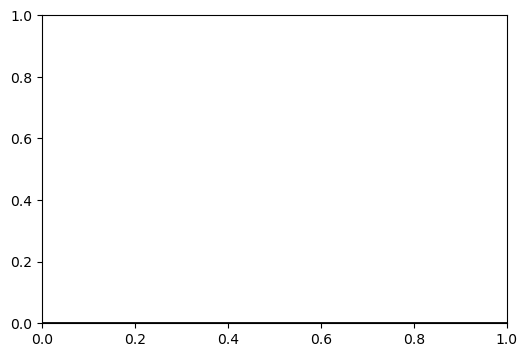

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import norm
import numpy as np

# plt.ion()  # turning interactive mode on

class gaussian_animator():
    def __init__(self, gaussian, figure, total_steps, x_limits=[-10,10], rng=np.random.default_rng()):
        self.gaussian = gaussian
        self.total_steps = total_steps
        self.rng = rng
        self.current_step = 0
        self.figure = figure

    def draw(self, number):
        ax = self.figure.gca()
        ax.clear()

        # Draw the horizontal line
        ax.axhline(y=0, color='black', linewidth=2)

        # Draw the green transparent rectangle for correct limits
        correct_limits = [gaussian.mean - gaussian.correct_n_stds*gaussian.std,
                          gaussian.mean + gaussian.correct_n_stds*gaussian.std]
        ax.add_patch(
            plt.Rectangle(
                (correct_limits[0], -0.05),  # (x, y)
                correct_limits[1] - correct_limits[0],  # width
                0.1,  # height
                color='green',
                alpha=0.3,
                zorder=0
            )
        )
        # Draw the red cross at the specified number
        ax.plot(number, 0, marker='x', color='red', markersize=12, markeredgewidth=3, label='Your guess')

        # Draw the Gaussian above the line
        x = np.linspace(gaussian.mean - 10*gaussian.std, gaussian.mean + 10*gaussian.std, 400)
        y = norm.pdf(x, gaussian.mean, gaussian.std)
        y = y / y.max() * 0.5 + 0.2  # Scale and shift up for visibility above the line
        ax.plot(x, y, color='blue', label='Gaussian')

        # Optionally, mark the mean of the Gaussian
        ax.plot(gaussian.mean, 0.2 + 0.5, marker='o', color='blue', markersize=8, label='Mean')

        # Formatting
        ax.set_ylim(-0.2, 1)
        # ax.set_xlim(mean - x_std_limits, mean + x_std_limits)
        ax.set_xlim(gaussian.x_limits)
        ax.set_yticks([])
        ax.legend()
        self.figure.canvas.draw() 

class NonStationaryGaussian:
    def __init__(self, mean=0.0, std=1.0, mean_drift_std=0.1, correct_n_stds=3, n_steps=300, rng=None):
        self.mean = mean
        self.std = std
        self.mean_drift_std = mean_drift_std
        self.rng = rng if rng is not None else np.random.default_rng()
        # self.figure = plt.figure(figsize=(6, 4))
        self.n_steps = n_steps
        self.animator = gaussian_animator(self, figure=plt.figure(figsize=(6, 4)), total_steps=self.n_steps, x_limits=[-10,10] , rng=np.random.default_rng(42))

    def sample(self):
        return self.rng.normal(self.mean, self.std)

    def step(self):
        # Slightly change the mean to simulate non-stationarity
        # self.mean += self.rng.normal(0, self.mean_drift_std)
        self.mean += self.rng.choice([-self.mean_drift_std, self.mean_drift_std])
        
    def is_within_stds(self, value):
        """
        Check if a value is within n standard deviations from the mean.
        """
        return abs(value - self.mean) <= self.correct_n_stds * self.std
    
    # def animate(self, guess=None, steps=100, x_limits=[-10,10], n_stds=1):
    #     fig = self.figure

    #     def update(frame):
    #         mean = self.mean
    #         std = self.std
    #         self.animator.draw(guess, mean, std, x_limits=x_limits, n_stds=n_stds)

    #     ani = FuncAnimation(fig, update, frames=steps, repeat=False, interval=200)
    #     return ani

# Example usage:

#parameters
total_steps = 300
rng = np.random.default_rng(42)
q_value = np.empty((total_steps))
alpha = 0.1

gaussian = NonStationaryGaussian(mean=0.0, std=1.0, mean_drift_std=0.5, rng=rng)
# gaussian.figure.show()
initial_guess = 0.5
q_value[0] = initial_guess  # Initialize the first guess
for step in range(total_steps):
    # Sample from the non-stationary Gaussian
    # sample = gaussian.sample()
    # Check if the sample is within 1 standard deviation of the mean
    if gaussian.is_within_stds(q_value[step]):
        # print(f"Step {step}: Sample {q_value[step]} is within {n_stds} std of the mean.")
        reward = 0  # Correct guess, no reward
    else:
        # print(f"Step {step}: Sample {q_value[step]} is outside {n_stds} std of the mean.")
        reward = -1.0  # incorrect guess, negative reward
    
    # Update the Q-table
    if step+1 < total_steps:
        q_value[step+1] = q_value[step] + alpha * (reward - q_value[step])
    
    # Update the Gaussian mean for the next step
    gaussian.step()
    # gaussian.animate(guess=q_value[step], steps=total_steps)
    gaussian.animator.draw(q_value[step])
    # gaussian.figure.canvas.flush_events()
    clear_output(wait=True)
    display(gaussian.figure)
    time.sleep(0.1)